<a href="https://colab.research.google.com/github/baerenstein/DEDA_class_SoSe2023/blob/main/garch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arch

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

In [39]:
df = yf.Ticker('BAC')
df = df.history(period='7y', interval='1d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2016-08-17 00:00:00-04:00 to 2023-08-17 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1762 non-null   float64
 1   High          1762 non-null   float64
 2   Low           1762 non-null   float64
 3   Close         1762 non-null   float64
 4   Volume        1762 non-null   int64  
 5   Dividends     1762 non-null   float64
 6   Stock Splits  1762 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 110.1 KB


<Axes: xlabel='Date'>

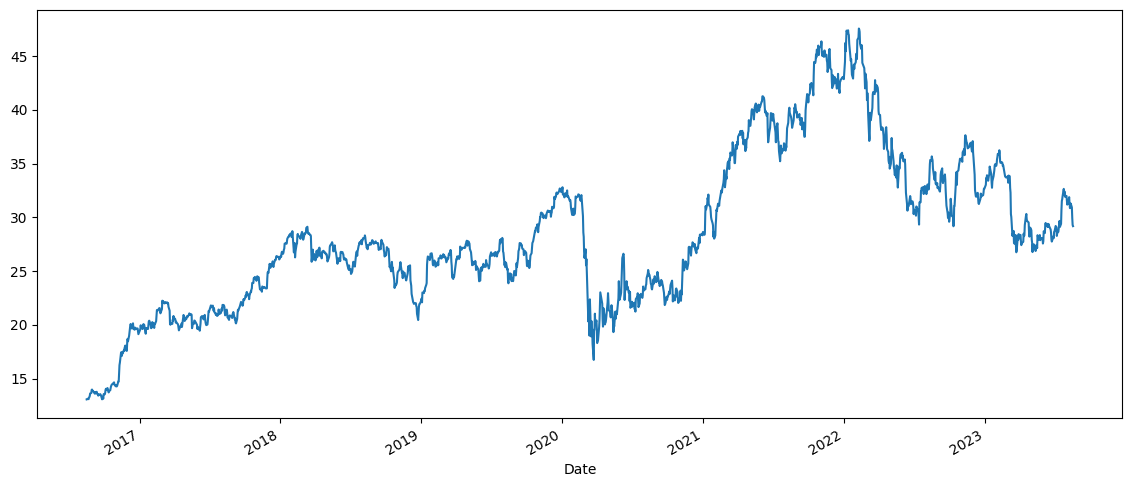

In [40]:
df['Close'].plot(figsize=(14,6))

<Axes: xlabel='Date'>

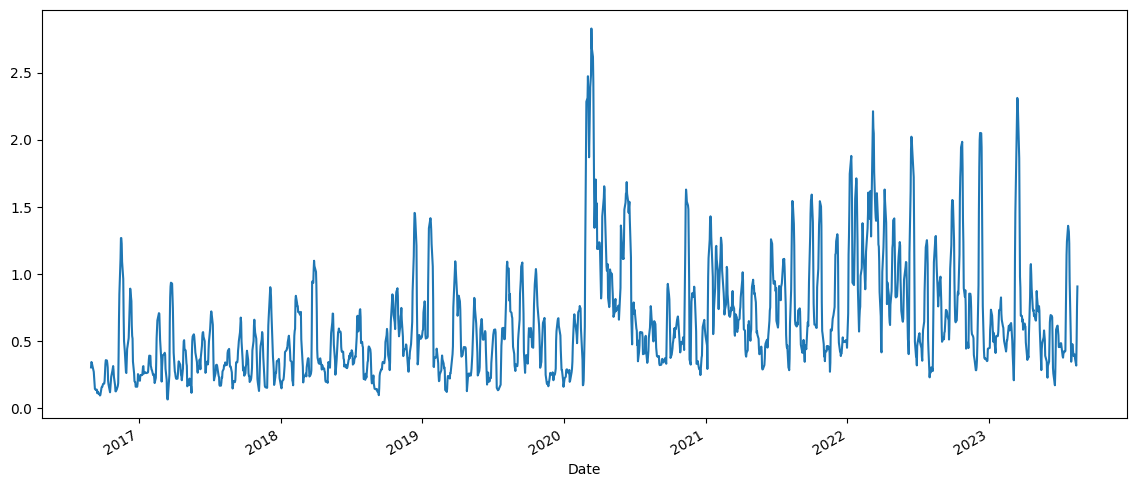

In [41]:
df['Volatility'] = df['Close'].rolling(window=10).std()

df['Volatility'].plot(figsize=(14,6))

<Axes: xlabel='Date'>

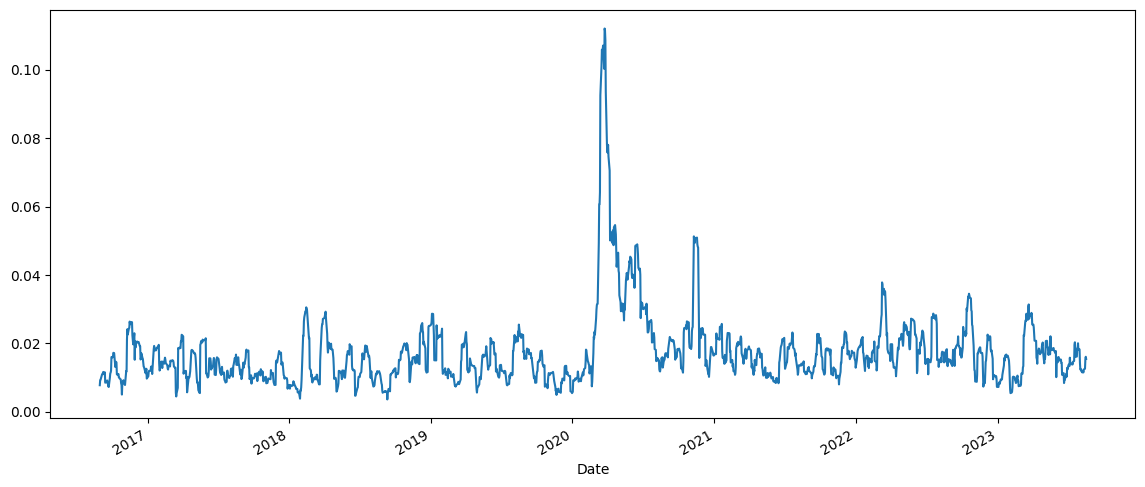

In [42]:
df['Return'] = df['Close'].pct_change()
df['Volatility_r'] = df['Return'].rolling(window=10).std()

df['Volatility_r'].plot(figsize=(14,6))

In [43]:
market = df["Close"]
returns = 100 * market.pct_change().dropna()

In [44]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     33,   Neg. LLF: 4075.1343305293094
Iteration:     10,   Func. Count:     61,   Neg. LLF: 3485.1665560432807
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3485.1665560432807
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11


In [45]:
forecasts = res.forecast(reindex=False)

print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                                h.1
Date                               
2023-08-17 00:00:00-04:00  0.116035
                                h.1
Date                               
2023-08-17 00:00:00-04:00  3.287348
                                h.1
Date                               
2023-08-17 00:00:00-04:00  3.287348


Returns Variance
If the square root is used, the standard deviation is returned.

In [48]:
forecasts = res.forecast(horizon=5, reindex=False)
print(forecasts.residual_variance.iloc[-3:])

                                h.1       h.2       h.3       h.4       h.5
Date                                                                       
2023-08-17 00:00:00-04:00  3.287348  3.309912  3.330821  3.350198  3.368153
